In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
path_root = os.path.dirname(os.getcwd())
path_data1 = os.path.join(path_root, "18752project")
path_data = os.path.join(path_data1, "data")
data_path = os.path.join(path_data, "weather_dataset.csv")
label_data_path = os.path.join(path_data, "weather_prediction_sleep_labels.csv")

# Load the datasets
features_df = pd.read_csv(data_path)
labels_df = pd.read_csv(label_data_path)

# Merge the features and labels DataFrames on the 'DATE' column
full_dataset = pd.merge(features_df, labels_df, on='DATE')

X = full_dataset.drop(columns=['sleep_weather', 'DATE', 'MONTH'])
y = full_dataset['sleep_weather']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [20]:
from sklearn.svm import SVC
# Support Vector Machine classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy of SVM classifier:", accuracy)
print("Classification report:\n", report)


Accuracy of SVM classifier: 0.8768809849521204
Classification report:
               precision    recall  f1-score   support

       False       0.90      0.87      0.89       408
        True       0.85      0.88      0.86       323

    accuracy                           0.88       731
   macro avg       0.87      0.88      0.88       731
weighted avg       0.88      0.88      0.88       731



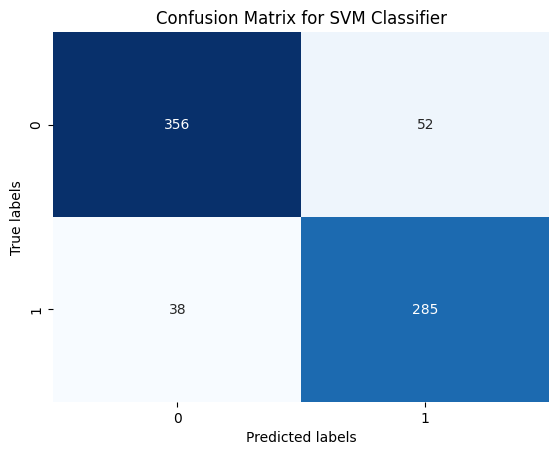

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()


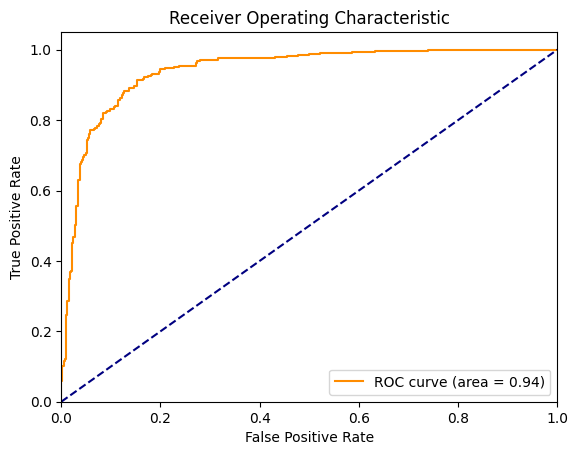

In [22]:
from sklearn.metrics import roc_curve, auc

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, svm_classifier.decision_function(X_test))

# Calculate the AUC
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

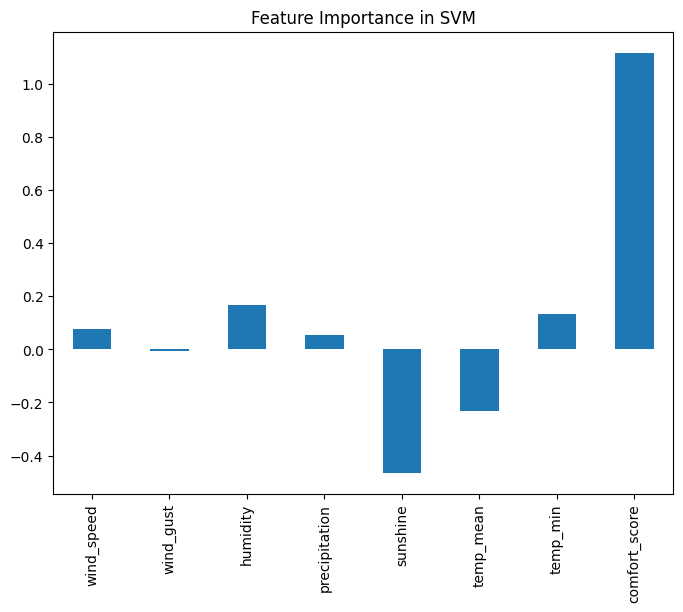

In [23]:
# Feature importance
feature_importance = pd.Series(svm_classifier.coef_[0], index=X_train.columns)

plt.figure(figsize=(8, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance in SVM')
plt.show()

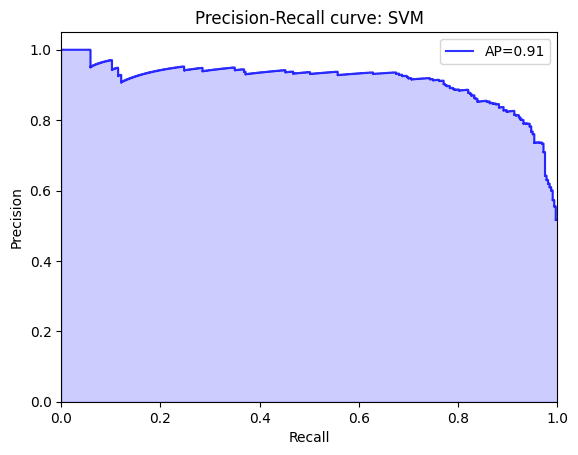

In [28]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision-recall pairs for different probability thresholds
precision, recall, thresholds = precision_recall_curve(y_test, svm_classifier.decision_function(X_test))
average_precision = average_precision_score(y_test, svm_classifier.decision_function(X_test))

# Plot Precision-Recall curve
plt.figure()
plt.step(recall, precision, where='post', color='b', alpha=0.8, label=f'AP={average_precision:.2f}')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: SVM')
plt.legend(loc='upper right')
plt.show()


In [29]:
from sklearn.model_selection import cross_val_score

# Conduct 5-fold cross-validation
cv_scores = cross_val_score(svm_classifier, X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores for SVM:", cv_scores)
print("Average cross-validation score for SVM:", cv_scores.mean())

Cross-validation scores: [0.86456908 0.85636115 0.84541724 0.85342466 0.88630137]
Average cross-validation score: 0.8612146993235014


In [24]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest_classifier.fit(X_train, y_train)

y_pred = random_forest_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy of Random Forest classifier:", accuracy)
print("Classification report:\n", report)

Accuracy of Random Forest classifier: 0.8905608755129959
Classification report:
               precision    recall  f1-score   support

       False       0.92      0.88      0.90       408
        True       0.86      0.90      0.88       323

    accuracy                           0.89       731
   macro avg       0.89      0.89      0.89       731
weighted avg       0.89      0.89      0.89       731



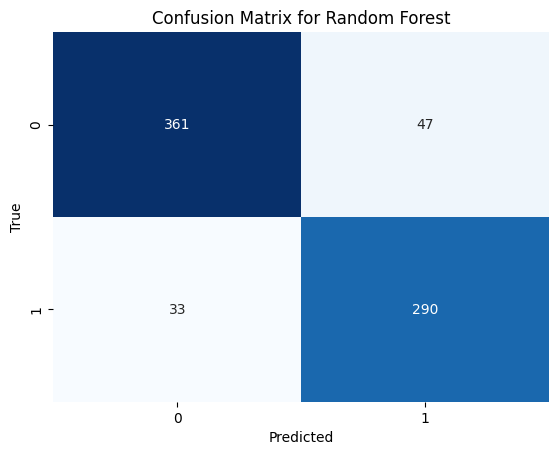

In [25]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest')
plt.show()

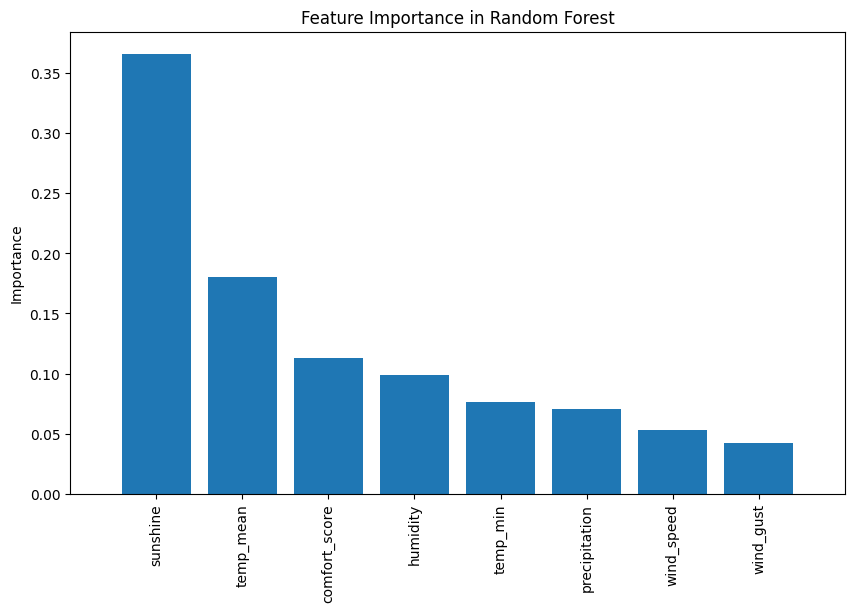

In [26]:
feature_importances = random_forest_classifier.feature_importances_
indices = np.argsort(feature_importances)[::-1]
features = X_train.columns

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance in Random Forest")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.ylabel('Importance')
plt.show()

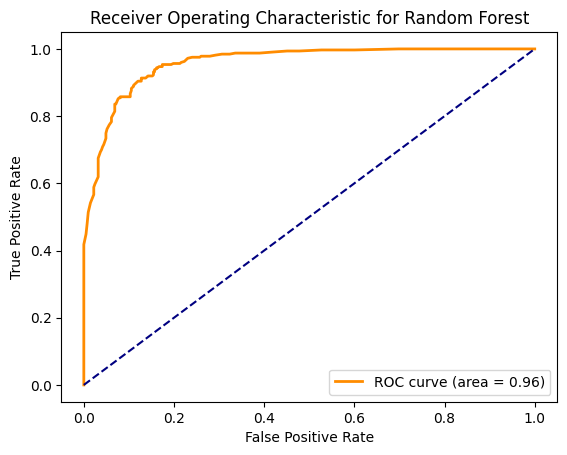

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, random_forest_classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Random Forest')
plt.legend(loc="lower right")
plt.show()

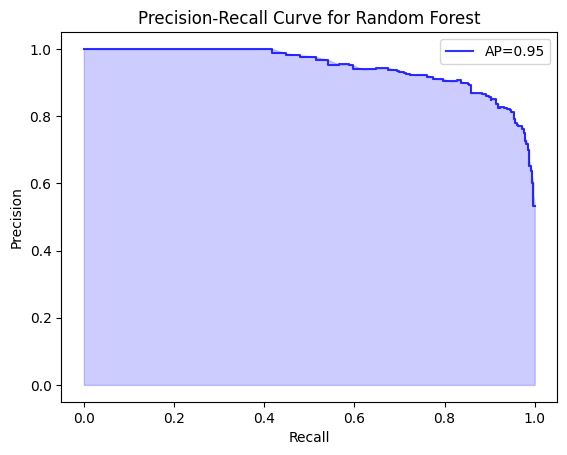

In [30]:
precision, recall, _ = precision_recall_curve(y_test, random_forest_classifier.predict_proba(X_test)[:, 1])
average_precision = average_precision_score(y_test, random_forest_classifier.predict_proba(X_test)[:, 1])

plt.figure()
plt.step(recall, precision, where='post', color='b', alpha=0.8, label=f'AP={average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest')
plt.legend(loc="upper right")
plt.fill_between(recall, precision, alpha=0.2, color='b')
plt.show()

In [31]:
scores = cross_val_score(random_forest_classifier, X, y, cv=5)
print("Cross-validation scores for random forest:", scores)
print("Mean cross-validation score for random forest:", scores.mean())

Cross-validation scores: [0.87824897 0.89876881 0.86593707 0.89041096 0.89863014]
Mean cross-validation score: 0.886399190450312
